# Udacity MLND Capstone Project Proposal
## The Dataset
The dataset used in this project is called the **UrbanSound8K Dataset**, an annotated form of the Urban Sound Dataset. It is a collection of short audio clips that fall into one of 10 categories:
- Air Conditioner
- Car Horn
- Children Playing
- Dog bark
- Drilling
- Engine Idling
- Gun Shot
- Jackhammer
- Siren
- Street Music

The accompanying metadata contains a unique ID for each sound excerpt along with it's given class name. The full dataset can be downloaded [here](https://urbansounddataset.weebly.com/urbansound8k.html).

The audio clips are of the .wav format. Meaning that there has been no compression done to the audio waveform. Sound waves are digitised by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz meaning samples are taken 44,100 times per second). 

Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).
### Data Analyis
#### Tools
 - **iPython.display.Audio:** Allows Jupyter notebooks to play audio.
 - **Librosa:** LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

#### Auditory Inspection

In [1]:
import IPython.display as ip

AUDIO_DIR = 'data/urbansound8k/audio'
ip.Audio(AUDIO_DIR+'/Fold6/4912-3-2-0.wav')

#### Visual Inspection

Let us observe the waveform of each class.

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os

def show_waveform(filepath):
    plt.figure(figsize=(12,5))
    data, sample_rate = librosa.load(filepath,sr=22050)
    _ = librosa.display.waveplot(data,sr=sample_rate)

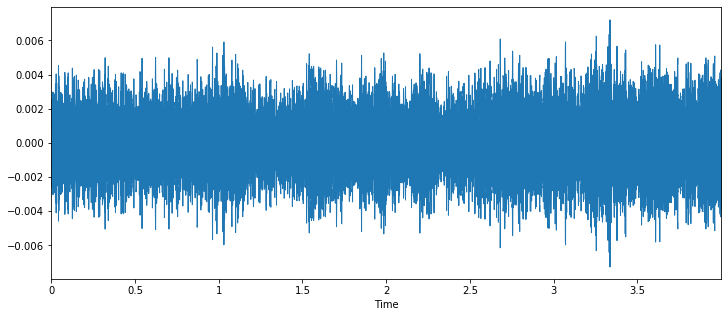

In [3]:
# Air Conditioner
filepath = AUDIO_DIR+'/Fold6/34952-8-0-5.wav'
show_waveform(filepath)
ip.Audio(filepath)

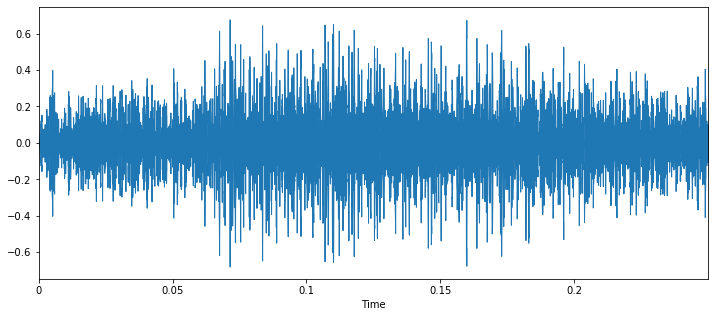

In [4]:
# Car Horn
filepath = AUDIO_DIR+'/fold1/156194-1-0-0.wav'
show_waveform(filepath)
ip.Audio(filepath)

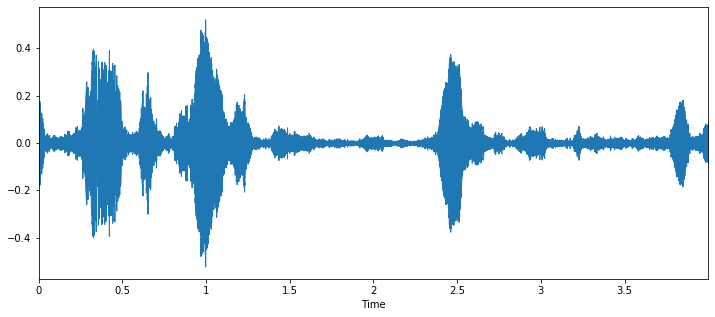

In [5]:
# Children Playing
filepath = AUDIO_DIR+'/Fold10/101382-2-0-20.wav'
show_waveform(filepath)
ip.Audio(filepath)

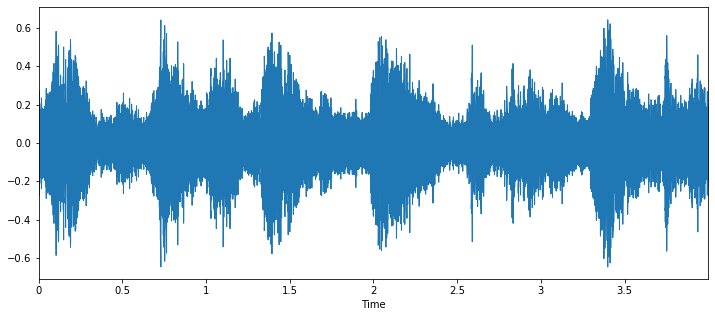

In [6]:
# Dog bark
filepath = AUDIO_DIR+'/fold6/101281-3-0-14.wav'
show_waveform(filepath)
ip.Audio(filepath)

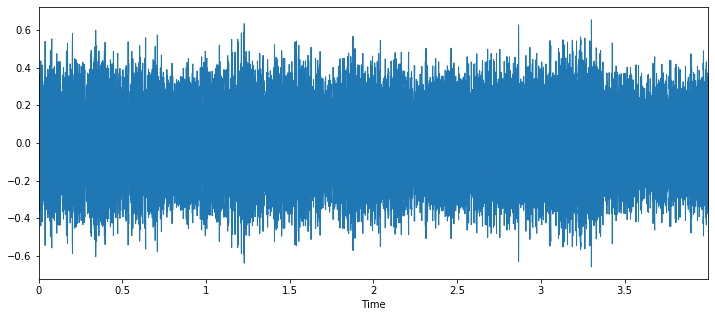

In [7]:
# Drilling
filepath = AUDIO_DIR+'/fold3/103199-4-2-11.wav'
show_waveform(filepath)
ip.Audio(filepath)

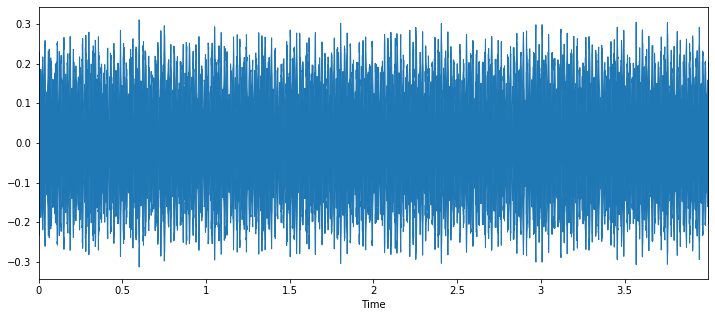

In [8]:
# Engine Idling
filepath = AUDIO_DIR+'/fold10/102857-5-0-16.wav'
show_waveform(filepath)
ip.Audio(filepath)

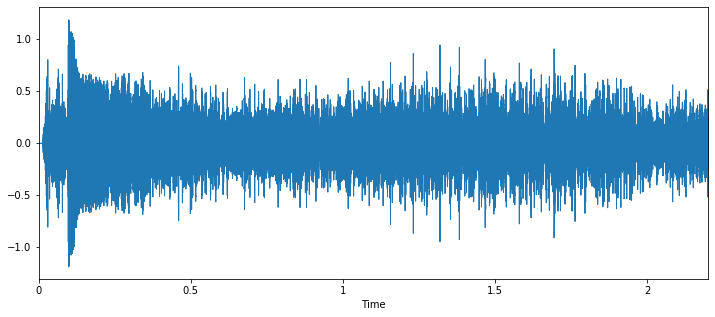

In [9]:
# gun shot
filepath = AUDIO_DIR+'/fold3/135526-6-6-0.wav'
show_waveform(filepath)
ip.Audio(filepath)

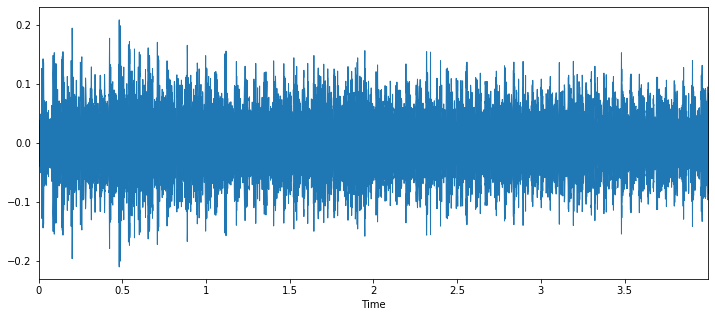

In [10]:
# Jackhammer
filepath = AUDIO_DIR+'/fold1/103074-7-3-0.wav'
show_waveform(filepath)
ip.Audio(filepath)

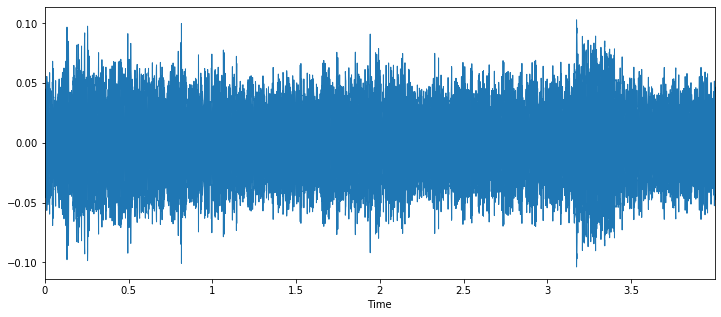

In [11]:
# Siren
filepath = AUDIO_DIR+'/fold2/102871-8-0-12.wav'
show_waveform(filepath)
ip.Audio(filepath)

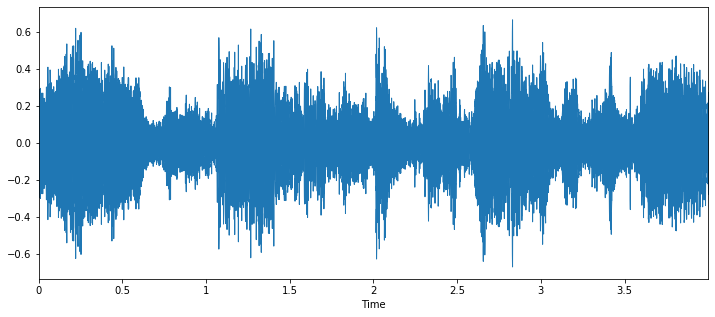

In [12]:
# Street Music
filepath = AUDIO_DIR+'/fold5/105425-9-0-12.wav'
show_waveform(filepath)
ip.Audio(filepath)

### Observations

Visual inspection of waveform is very trial and error in nature. Some waveforms like the gunshot or the street music samples are easy to distinguish due to prominent features like a single sharp peak or the relatively unique shape of music waveforms. Others like drilling, jackhammer and engine idling are hard to distinguish from visual inspection alone due to the fast pediodic nature of their waveforms.

At a glance, it seems like things that are supposed to make noise like human voices, music or car horn have a much greater difference between their lowest and highest amplitudes than things like and idling engine whose primary function is not to make noise

Still, it is difficult to distinguish similar sounds through visual inspection.

## Metadata

We shall analyze the metadata.csv file corresponding to this dataset.

In [13]:
META_PATH = 'data/urbansound8k/metadata/UrbanSound8K.csv'
metadata = pd.read_csv(META_PATH)
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

### Class Distribution

In [14]:
metadata['class'].value_counts()

children_playing    1000
engine_idling       1000
street_music        1000
drilling            1000
air_conditioner     1000
dog_bark            1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

### Observations
It can be seen that the labels are unbalanced. The gun_shot and car_horn classes have less than 500 datapoints each. This will have to be addressed when preprocessing.

### File Properties

In [30]:
import struct
from helper_functions import get_info

audiodata = []
for index, row in metadata.iterrows():
    filename = os.path.join(os.path.abspath('data/UrbanSound8K/audio/'),
                            'fold'+str(row["fold"])+'/',
                            str(row["slice_file_name"]))
    data = get_info(filename)
    audiodata.append(data)
    
#Convert into a dataframe
audio_prop = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

### Audio Channels

Most samples are stereo. Hence they have 2 channels. This wouldn't have been a problem if there weren't some Mono-channel samples as well.

The easiest option is to make all of them mono my merging the 2 channels by averaging the values in both the channels.

In [20]:
# Channel count
audio_prop['num_channels'].value_counts(normalize=True)

2    0.915369
1    0.084631
Name: num_channels, dtype: float64

### Sample rate 

There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k). This means they files will all have to be resampled at a common sampling rate.

In [17]:
# Sample rates
audio_prop['sample_rate'].value_counts(normalize=True)

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64

### Bit-depth 

Bit depths of the files are also variable and will have to be normalized.

In [21]:
audio_prop.bit_depth.value_counts(normalize=True)

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64